In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [32]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/credit_data.csv")
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [3]:
features = df[["income", "age", "loan"]]
target = df.default

In [4]:
X = np.array(features).reshape(-1,3)
y = np.array(target)

In [5]:
X = preprocessing.MinMaxScaler().fit_transform(X)

In [6]:
print(X)

[[0.9231759  0.89209175 0.58883739]
 [0.28812165 0.65470788 0.47682695]
 [0.74633429 0.9811888  0.58262011]
 ...
 [0.48612202 0.21695807 0.40112895]
 [0.47500998 1.         0.1177903 ]
 [0.98881367 0.82970913 0.53597028]]


In [7]:
feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.3)

In [29]:
model = KNeighborsClassifier(n_neighbors=32)

In [30]:
fittedModel = model.fit(feature_train, target_train)
pred = fittedModel.predict(feature_test)

In [31]:
print(confusion_matrix(target_test, pred))
print(accuracy_score(target_test, pred))

[[508   1]
 [ 13  78]]
0.9766666666666667


In [26]:
cross_valid_scores = []

In [33]:
k_values = range(1,100)

In [27]:
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())

In [28]:
print("Optimal k with cross validation: ", np.argmax(cross_valid_scores))

Optimal k with cross validation:  32


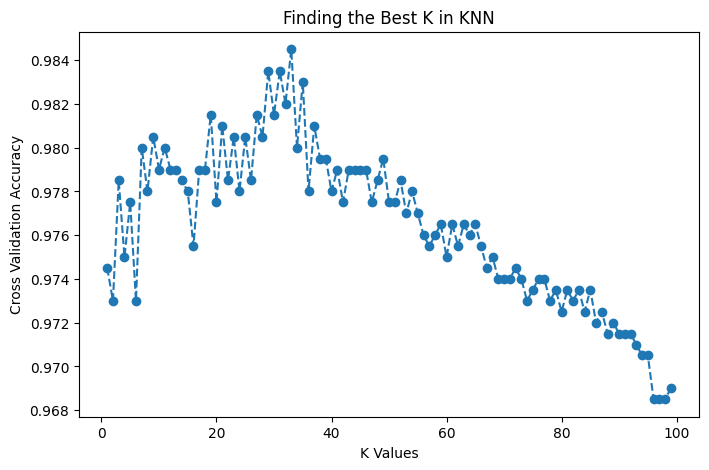

In [34]:
plt.figure(figsize=(8,5))
plt.plot(k_values, cross_valid_scores, marker='o', linestyle='dashed')
plt.xlabel('K Values')
plt.ylabel("Cross Validation Accuracy")
plt.title('Finding the Best K in KNN')
plt.show()